# npx-32 location

author: steeve.laquitaine@epfl.ch  
date: 02.03.2023  
last modified: 17-07-2023  
regression: none  
status: OK  

**brief**:

* We constructed a `Neuropixels-32` probe with 32 contacts aligned with MEAUtils's `Neuropixels-384`'s contacts 127 to 158.
* The probe was centered on the centroid of a group of seven-column circuit (`O1`, `211,712` cells) and not the 30,190 cells from a single column (`hex_0`).
* `534` cells are w/n 50 um radius of the contacts

## Setup 

Create and activate `npx_10m_384ch_unit_classes`

In [3]:
# SET PACKAGES
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import h5py

pd.set_option('display.max_colwidth', None)

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/bernstein_2023/"

os.chdir(PROJ_PATH)
from src.nodes.load import load_campaign_params
from src.nodes.truth.silico import ground_truth
from src.nodes.utils import get_config
from src.nodes.dataeng.silico.filtering import get_hex_01_cells, filter_microcircuit_cells
from src.nodes.utils import write_metadata
from src.nodes.dataeng.silico import probe_wiring
from src.nodes import viz 


# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"       # specifies the experiment from conf/
SIMULATION_DATE = "2023_02_19"          # specifies the run (date)
CONTACT_IDS = np.arange(127, 127+32, 1) # selected contact ids from Neuropixels-384 template for our probe


# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()


# SET OUTPUT FIGURE PATHS
FIG_PATH = data_conf["figures"]["silico"]["probe_location"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-09-11 12:15:47,461 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-11 12:15:47,488 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [4]:
# load simulation parameters
simulation = load_campaign_params(data_conf)

# report
print("The circuit targeted for simulation was:", simulation["blue_config"]["Run_Default"]["CircuitTarget"])

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


The circuit targeted for simulation was: hex0


### 7-column circuit (`hex_01`) used to position the probe

(See 3)

In the source code that generated the channel weight file, the seven-columns circuit (`hex_01`, `O1`) was used to position the probe (at its centroid).

In [5]:
# count cells in the target region
print("Total cells (count):", simulation["circuit"].cells.count())

# get the cell cooordinates of the seven-column circuit's cells
# used to center the probe
filtered = get_hex_01_cells(simulation)
print("Seven-column circuit cells (count): ", len(filtered["soma_location"]))
print("Cell soma coordinates:")
filtered["soma_location"].head(3)

# describe cells (see 1)
print("Target cell id preview:", filtered["gid"], "\n")

# # list other available cell group (see 1)
# print("Other available target groups:\n\n", sorted(simulation["circuit"].cells.targets))

Total cells (count): 4234929
Seven-column circuit cells (count):  211712
Cell soma coordinates:
Target cell id preview: [    301     335     381 ... 4234649 4234716 4234804] 



### Microcircuit (`hex0`) for activity simulation

In [6]:
# get microcircuit neurons' soma coordinates
microcircuit = filter_microcircuit_cells(simulation)
print("Cortical column cells simulated (count): ", len(microcircuit["soma_location"]))
print("Cell soma coordinates:")
microcircuit["soma_location"].head(3)

# describe cells (see 1)
print("Preview of target cell id:", microcircuit["gid"], "\n")

# # list other available cell group (see 1)
# print("Other available target groups:\n\n", sorted(simulation["circuit"].cells.targets))

Cortical column cells simulated (count):  30190
Cell soma coordinates:
Preview of target cell id: [    301     335     381 ... 4234649 4234716 4234804] 



### Cells w/n 50 um of the contacts

In [10]:
# get ground truth SpikeInterface's Sorting Extractor object (stats: 96 min for 534 cells, when first created)
SortingObject = ground_truth.load(data_conf)

# count cells with simulated activity
unit_count = SortingObject.get_num_units()
print("Cells (count): ", unit_count)

# locate them
sorted_cell_location = simulation["circuit"].cells.get(SortingObject.unit_ids, properties=[ 
    'x','y','z'])
print("Cells coordinates:")
sorted_cell_location

2023-07-17 21:14:33,437 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-07-17 21:14:33,449 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0
Cells (count):  534
Cells coordinates:


,x,y,z
19690,4325.824282,-1373.816404,-2054.364213
24768,4235.037218,-1328.432993,-2177.328356
37423,4310.171761,-1392.046722,-2045.274625
39862,4332.834513,-1348.455005,-2047.658709
45637,4301.529315,-1381.449682,-2097.948897
...,...,...,...
4216128,3939.842589,-1248.265663,-2429.875494
4217493,4059.157323,-1295.265678,-2340.085474
4221920,3884.248924,-1230.523763,-2510.003429
4228700,3868.225204,-1278.185044,-2528.265432


In [ ]:
# # filter all near-contact pyramidal cells
# cell_morph = simulation["circuit"].cells.get(SortingObject.unit_ids, properties=['morph_class'])
# PYR_CELL_IDS = cell_morph[cell_morph["morph_class"] == "PYR"].index.values
# print("near-contact pyr. cells (count): ", len(PYR_CELL_IDS))

### Check probe location from source code

In [7]:
# wire preprocessed recording with probe and write to file
recording = probe_wiring.run_neuropixels_32(data_conf, param_conf)

# write
# probe_wiring.write(recording, data_conf)

# get contact coordinates
ProbeNeuropix32 = recording.get_probe()
probe_coord = ProbeNeuropix32.contact_positions.astype(float)

2023-09-11 12:17:25,361 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting raw traces as SpikeInterface Recording object ...
2023-09-11 12:17:25,362 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting as raw traces as SpikeInterface Recording object - done in 0.0
2023-09-11 12:17:25,365 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe ...


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


2023-09-11 12:17:55,018 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe - done in 29.7
2023-09-11 12:17:55,019 - root - probe_wiring.py - run_neuropixels_32 - INFO - wiring neuropixels-32 probe to recording - done


### Plot in 7-column circuit

Probe contacts (in yellow) displayed with cells targetted for analysis (w/ 50 micron of the contacts, red) in seven-column circuit, used to position the probe (blue)


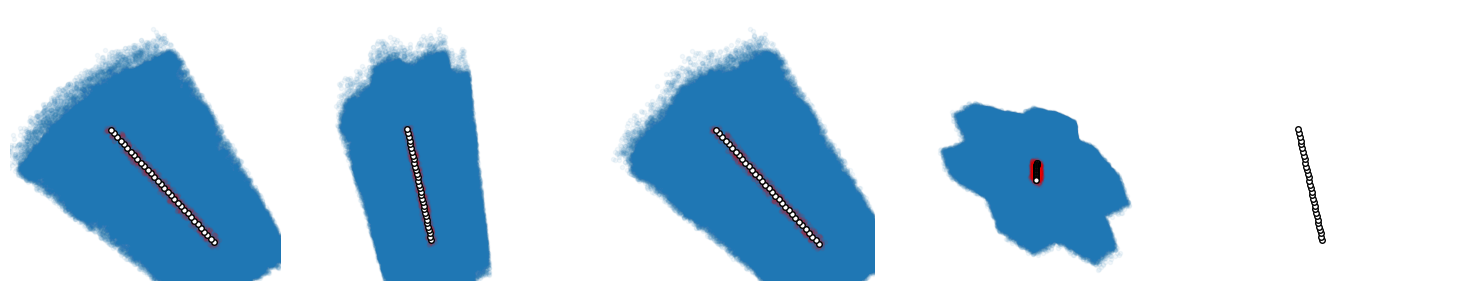

In [12]:
# plot probe with microcircuit and cell within 50 microns of the contacts
fig_01 = viz.plot_probe_with_circuit(
    cell_coord=filtered["soma_location"],
    target_cell_coord=sorted_cell_location,
    probe_coord=probe_coord,
    contact_ids=CONTACT_IDS
)
print("Probe contacts (in yellow) displayed with cells targetted for analysis (w/ 50 micron of the contacts, red) in seven-column circuit, used to position the probe (blue)")

### Plot in cortical column

Probe contacts (in yellow) displayed with cells targetted for analysis (w/ 50 micron of the contacts, red) in single-column microcircuit which cell activity were simulated (blue)


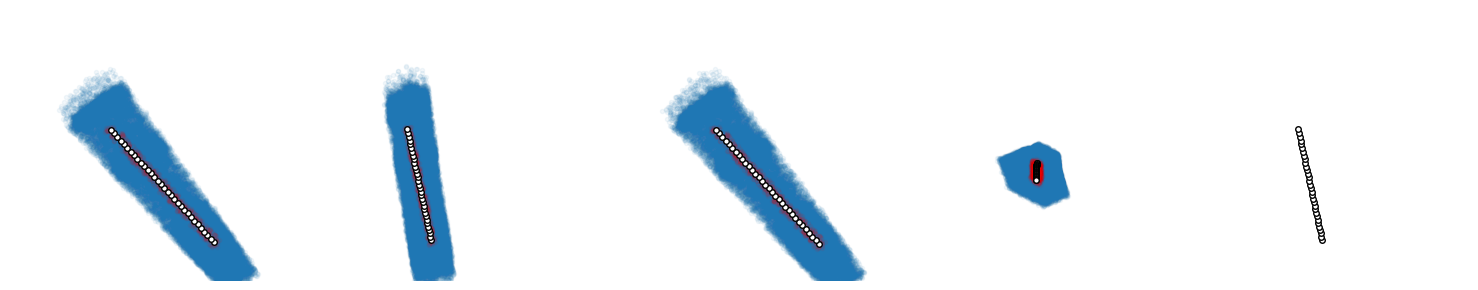

In [13]:
# plot probe with microcircuit and cell within 50 microns of the contacts
fig_02 = viz.plot_probe_with_circuit(
    cell_coord=microcircuit["soma_location"],
    target_cell_coord=sorted_cell_location,
    probe_coord=probe_coord,
    contact_ids=CONTACT_IDS
)
print("Probe contacts (in yellow) displayed with cells targetted for analysis (w/ 50 micron of the contacts, red) in single-column microcircuit which cell activity were simulated (blue)")

### Check that we replicate the source weight file coordinates

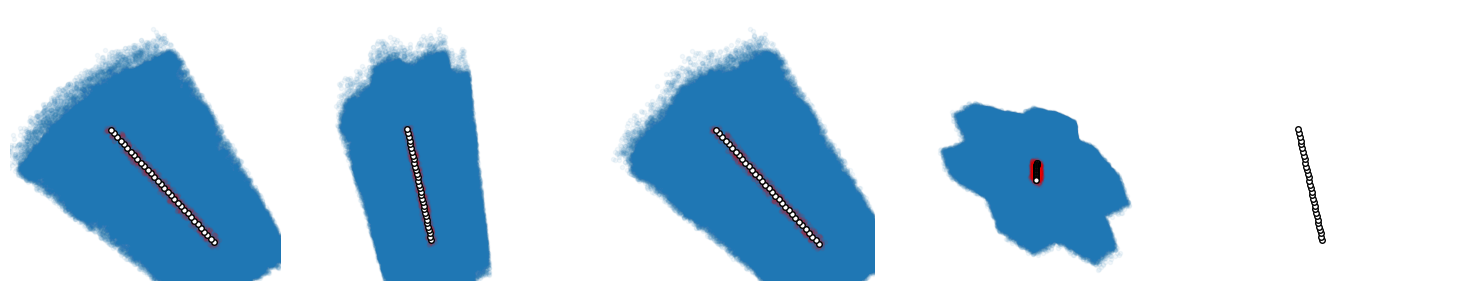

In [14]:
N_CHANNELS = 32
weightspath = data_conf["dataeng"]["chunks"]["input"]["weight"]
PLOT_DIM = 3

# load simulated recording sites coordinates
weight_file = h5py.File(weightspath, "r")
locationstmp = np.array([0, 0, 0])
contact_ids = []

for c_i in range(N_CHANNELS):

    # get contact ids from the weight file
    contact_id = str(list(weight_file["electrodes"].keys())[c_i][len("Neuropixels_384_"):])
    contact_ids.append(contact_id)

    # get the contacts' coordinates 
    temp = np.array(weight_file["electrodes"]["Neuropixels-384_" + contact_id]["location"])
    locationstmp = np.c_[locationstmp, temp]

contact_coords = locationstmp.T[1:]
contact_ids = np.array(contact_ids)

# plot probe with microcircuit and cell within 50 microns of the contacts
fig = viz.plot_probe_with_circuit(
    cell_coord=filtered["soma_location"],
    target_cell_coord=sorted_cell_location,
    probe_coord=contact_coords,
    contact_ids=contact_ids
)
weight_file.close()

In [15]:
print("old contact ids:", CONTACT_IDS)
print("\nnew contact ids:", ProbeNeuropix32.contact_ids)

old contact ids: [127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158]

new contact ids: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31']


### Check that we replicate the probe from the source code with `MEAutils`

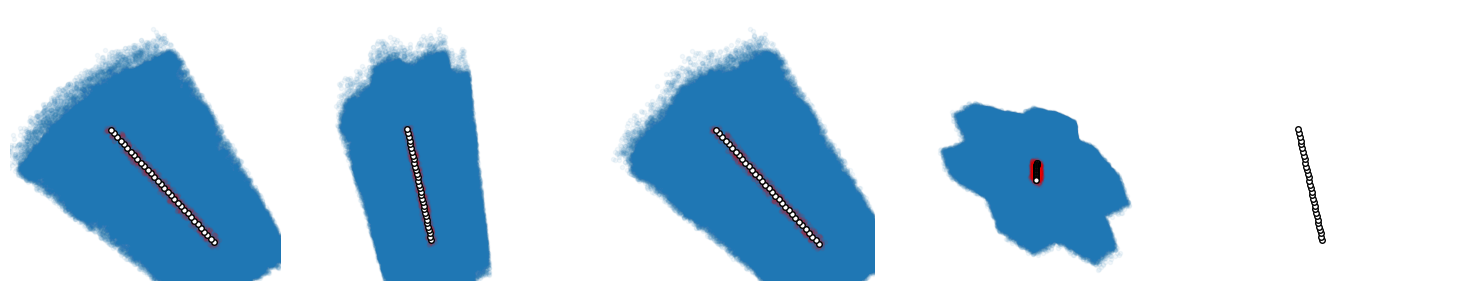

In [16]:
import MEAutility as MEA
import bluepy as bp
from sklearn.decomposition import PCA

N_CHANNELS = 32
weightspath = data_conf["dataeng"]["chunks"]["input"]["weight"]
PLOT_DIM = 3
probe_name = "Neuropixels-384"

# load simulated recording sites coordinates
weight_file = h5py.File(weightspath, "r")
contact_ids = []

# get contact ids from the weight file
for c_i in range(N_CHANNELS):
    contact_id = int(list(weight_file["electrodes"].keys())[c_i][len("Neuropixels_384_"):])
    contact_ids.append(contact_id)
weight_file.close()


# create 384-contact probe
ProbeNeuropix384 = MEA.return_mea(probe_name)

somaPos = simulation["circuit"].cells.get({'$target': 'hex_O1'},properties=[bp.Cell.X, bp.Cell.Y, bp.Cell.Z])
center = np.mean(somaPos,axis=0).values
pca = PCA(n_components=3)
pca.fit(somaPos)
main_axis = pca.components_[0]
elevation = np.arctan2(np.sqrt(main_axis[0]**2+main_axis[1]**2),main_axis[2])
azimuth = np.arctan2(main_axis[1],main_axis[0])
ProbeNeuropix384.rotate([0,1,0],elevation*180/np.pi)
ProbeNeuropix384.rotate([0,0,1],azimuth*180/np.pi)
ProbeNeuropix384.move(center)

# plot probe with microcircuit and cell within 50 microns of the contacts
fig = viz.plot_probe_with_circuit(
    cell_coord=filtered["soma_location"],
    target_cell_coord=sorted_cell_location,
    probe_coord=ProbeNeuropix384.positions[contact_ids],
    contact_ids=contact_ids
)

### Check that the 32 contacts match those from the source template Neuropixels-384 

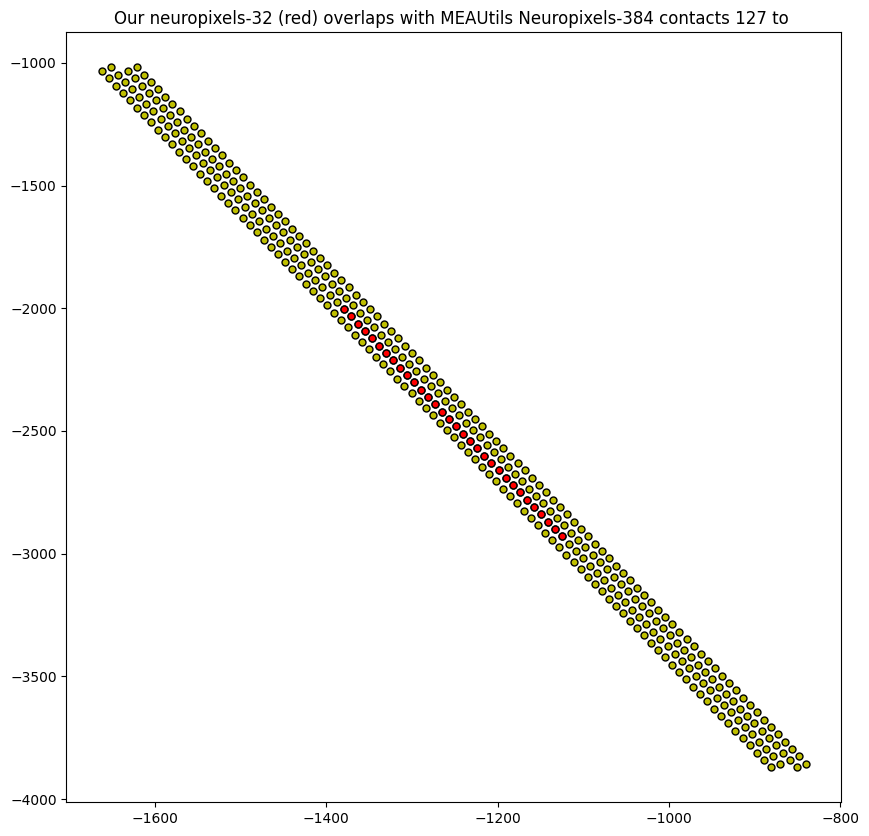

In [17]:
# plot both neuropixels-384 and our neuropixels-32
fig = plt.figure(figsize=(10,10));
plt.plot(ProbeNeuropix384.positions[:, 1], ProbeNeuropix384.positions[:, 2], marker=".",
        markersize=10,
        color="y",
        markeredgecolor="black",
        linestyle="None",
    );
plt.plot(ProbeNeuropix32.contact_positions[:, 1], ProbeNeuropix32.contact_positions[:, 2], marker=".",
        markersize=10,
        color="r",
        markeredgecolor="black",
        linestyle="None",
    );
plt.title("Our neuropixels-32 (red) overlaps with MEAUtils Neuropixels-384 contacts 127 to ");

# WRITE

In [82]:
# # save probe in microcircuit figure
# fig_02.savefig(FIG_PATH+".png")

# # write metadata
# metadata = {
#     "fig_path": FIG_PATH,
#     "creation_date": datetime.now().strftime("%d/%m/%Y %H:%M:%S"),
#     "simulation_date": SIMULATION_DATE,
#     "data_conf": data_conf,
#     "param_conf": param_conf,
#     }
# write_metadata(metadata, FIG_PATH)

# References

(1) https://bbpgitlab.epfl.ch/nse/bluepy/-/blob/main/examples/ipython_notebooks/Usecase%201%20-%20Selecting%20cells%20from%20a%20circuit.ipynb 

(2) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/index.html 

(3) https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/circuit.html 